<a href="https://colab.research.google.com/github/IsuruKasun/Predicting-which-passengers-survived-the-Titanic-shipwreck/blob/main/Predicting_which_passengers_survived_the_Titanic_shipwreck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np

**Import Data Frame**

In [74]:
from google.colab import drive
drive.mount('/content/drive')

directory_Path = '/content/drive/MyDrive/AI_Kaggle_Titanic'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
train = pd.read_csv('/content/drive/MyDrive/AI_Kaggle_Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/AI_Kaggle_Titanic/test.csv')

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train.shape

(891, 12)

In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
test.shape

(418, 11)

**Cleaning the data frame**

In [80]:
# drop names form train and test data sets
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)


In [81]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
#Pclass = Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)


In [83]:
#sex = male and female (male = 1/ female = 0)
train['Sex'] = train['Sex'].replace({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].replace({'male': 1, 'female': 0})


In [84]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
#Age = Age in years
print(train['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [86]:
# there are Nan values in Age
# drop Nan values fron Age
train = train.dropna(subset=['Age'])
test = test.dropna(subset=['Age'])

In [87]:
# sibsp = Number of siblings / spouses aboard the Titanic

In [88]:
# parch = Number of parents / children aboard the Titanic

In [89]:
# ticket = Ticket number
# drop Ticket number form train and test data sets
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)


In [90]:
# fare = Passenger fare

In [91]:
# cabin = Cabin number
# drop Cabin number form train and test data sets
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)


In [92]:
# embarked = Port of Embarkation   (C = Cherbourg = 1, Q = Queenstown = 2 , S = Southampton = 3)
train['Embarked'] = train['Embarked'].replace({'C': 1, 'Q': 2, 'S':3})
test['Embarked'] = test['Embarked'].replace({'C': 1, 'Q': 2, 'S': 3})

# drop Nan values fron Age
train = train.dropna(subset=['Embarked'])
test = test.dropna(subset=['Embarked'])


In [93]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,3.0
3,4,1,1,0,35.0,1,0,53.1000,3.0
4,5,0,3,1,35.0,0,0,8.0500,3.0


In [94]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029526,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655,-0.001836
Survived,0.029526,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.035609,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.024674,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,0.033681,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.082704,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,-0.011672,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.009655,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.001836,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


In [95]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

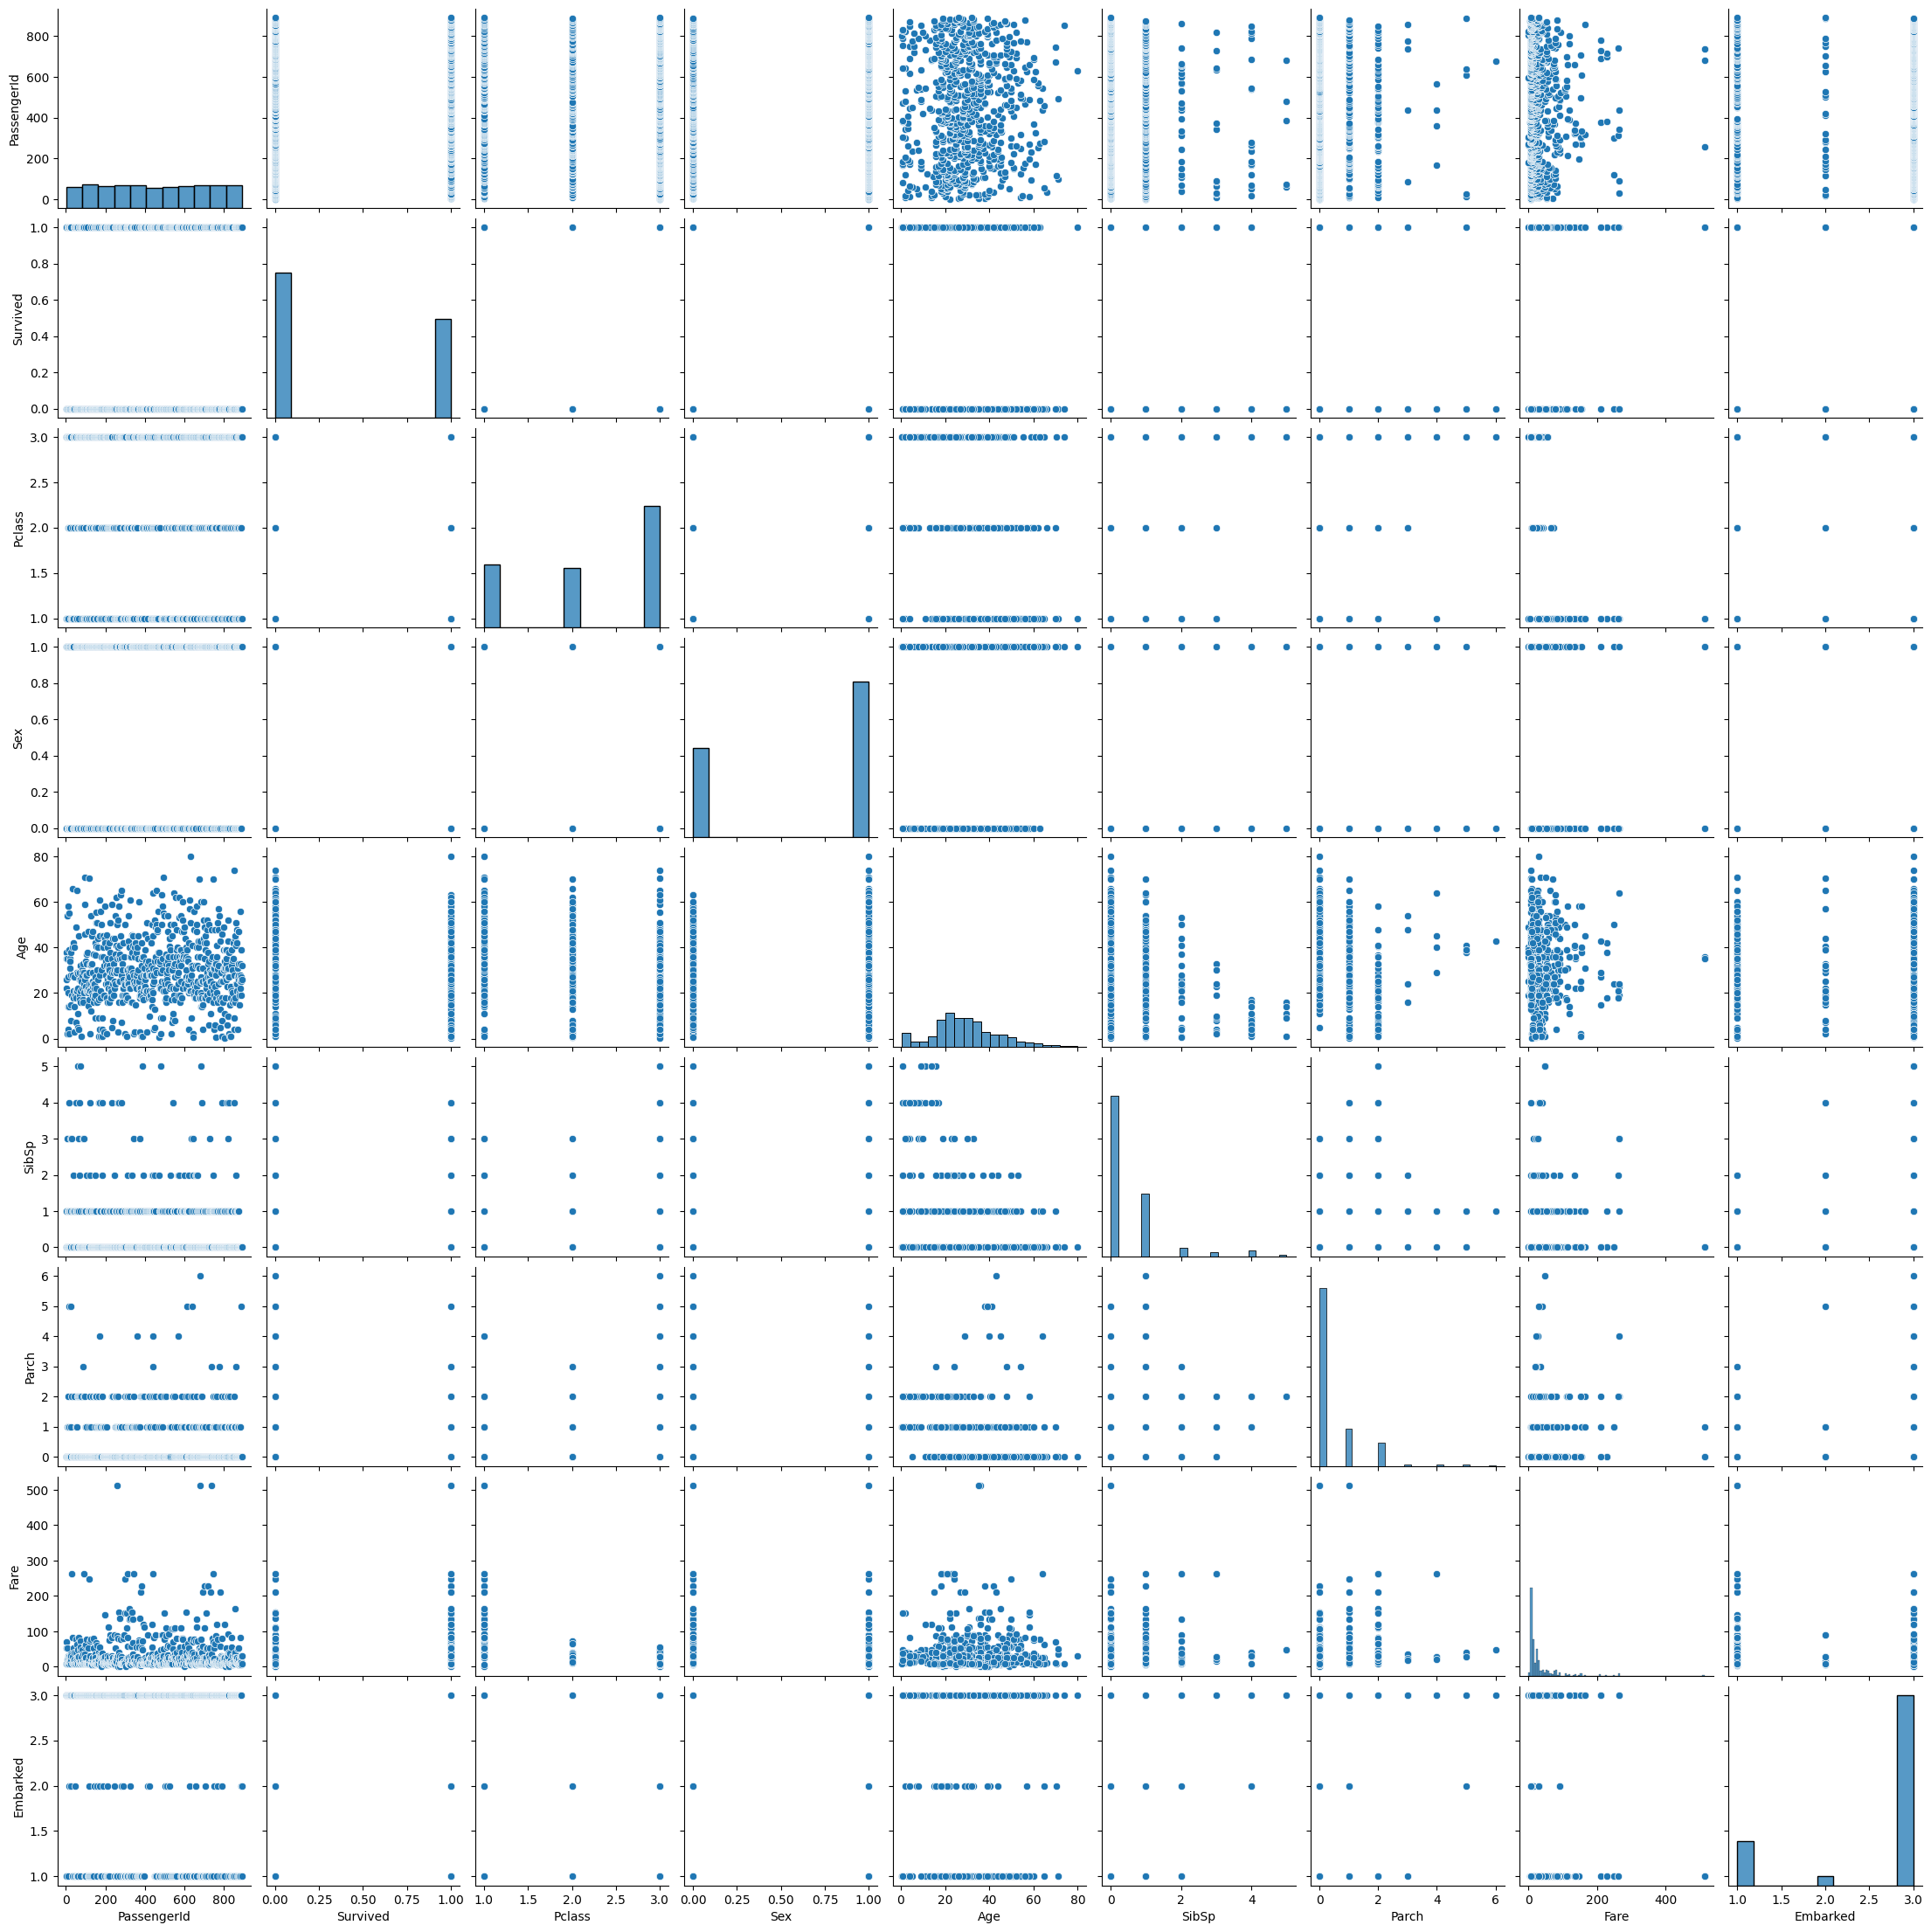

In [96]:
import seaborn as sns
sns.pairplot(train)

In [97]:
# plot the same thing in order to heat map to get more acurate plots
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
corrmat = train.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# grean = highly corelated
# red = negarively corelated
# The annot=True parameter adds the values of the correlation coefficients to the heatmap, and the cmap="RdYlGn" parameter sets the color map for the heatmap.


In [99]:
X = train.iloc[:,2:]
Y = train.iloc[:,1]
# predicting the selling price

In [100]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [101]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,3.0
3,1,0,35.0,1,0,53.1000,3.0
4,3,1,35.0,0,0,8.0500,3.0


In [102]:
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees Regressor algorithm from the scikit-learn library to train a machine learning model for regression analysis.
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [103]:
print(model.feature_importances_) # imporatance of each features to predict the Y value
# most important input features is (sex = 0.29)


[0.12360559 0.29736009 0.26273874 0.04792359 0.03265395 0.21373653
 0.02198151]


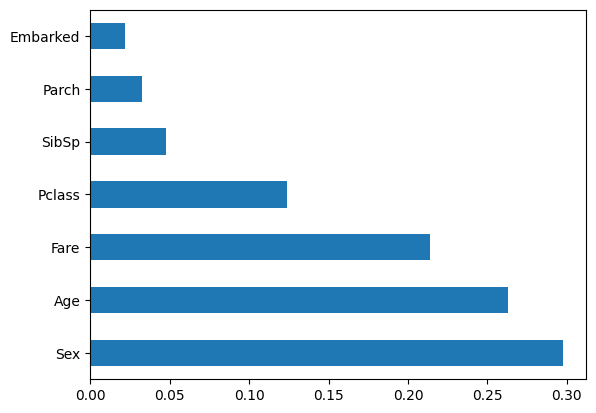

In [104]:
# plot the importance of features
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(7).plot(kind='barh')
plt.show()
# presrnt price has more importantce

In [105]:
feature_importances = {
    'Pclass': 0.12363885,
    'Sex': 0.29736009,
    'Age': 0.2654055,
    'SibSp': 0.04944769,
    'Parch': 0.03163518,
    'Fare': 0.20978183,
    'Embarked': 0.02273086
}

# Multiply each feature by its importance score
for feature, importance in feature_importances.items():
    train[feature] *= importance

**Machine Learning Model**

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor

In [107]:
import numpy as np
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #The number of decision trees in the random forest.
print(n_estimators) # it simply creates an array of 12 integer values that could be used as the n_estimators hyperparameter when creating a RandomForestRegressor model later on.

# number of features to concider at every split
# "auto", which means that the algorithm will consider all the features at each split.
# "sqrt" means that the algorithm will consider the square root of the total number of features at each split
max_features = ['auto','sqrt']

# max numbers of leavels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [108]:
from sklearn.model_selection import RandomizedSearchCV #tuning. It uses cross-validation to evaluate the performance of each combination of hyperparameters and returns the best combination of hyperparameters that result in the best performance on the given dataset.
# CV = cross validation


In [109]:
# creat a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [110]:

rf = RandomForestRegressor()

In [111]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X,Y)


**Predictions**

In [113]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [114]:
# drop NAn values of Fare
test = test.dropna(subset=['Fare'])

In [115]:
gender_submission = pd.read_csv('/content/drive/MyDrive/AI_Kaggle_Titanic/gender_submission.csv')

In [116]:
gender_submission.shape

(418, 2)

In [117]:
test.shape

(331, 8)

In [118]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,3
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,3
4,896,3,0,22.0,1,1,12.2875,3


In [119]:
merged_df = test.merge(gender_submission, on='PassengerId', how='inner')

In [120]:
merged_df.shape

(331, 9)

In [121]:
merged_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.5,0,0,7.8292,2,0
1,893,3,0,47.0,1,0,7.0000,3,1
2,894,2,1,62.0,0,0,9.6875,2,0
3,895,3,1,27.0,0,0,8.6625,3,0
4,896,3,0,22.0,1,1,12.2875,3,1


In [122]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,3
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,3
4,896,3,0,22.0,1,1,12.2875,3


In [123]:
gender_submission.head

<bound method NDFrame.head of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [124]:
actual_values = merged_df['Survived']

In [125]:
actual_values.shape

(331,)

In [161]:
test = test.drop('PassengerId', axis=1)

In [162]:
predictions= rf_random.predict(test)

In [128]:
from sklearn.metrics import r2_score
r2 = r2_score(actual_values, predictions)  # R^2 score only measures the goodness of fit of the model
print('accuracy score:', r2)


accuracy score: 0.5939736973030274


In [ ]:
pip install tensorflow_decision_forests

In [135]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0.370917,0.29736,5.838921,0.049448,0.0,1.520918,0.068193
1,2,1,0.123639,0.00000,10.085409,0.049448,0.0,14.953941,0.022731
2,3,1,0.370917,0.00000,6.900543,0.000000,0.0,1.662521,0.068193
3,4,1,0.123639,0.00000,9.289193,0.049448,0.0,11.139415,0.068193
4,5,0,0.370917,0.29736,9.289193,0.000000,0.0,1.688744,0.068193


In [156]:
import tensorflow_decision_forests as tfdf


model_2 = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.fit(X, Y)

Use /tmp/tmpist1rj2b as temporary training directory


ExtraTreesRegressor()

In [163]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,3.0
3,1,0,35.0,1,0,53.1000,3.0
4,3,1,35.0,0,0,8.0500,3.0


In [165]:
predictions_2 = model.predict(test)

In [166]:
from sklearn.metrics import r2_score
r2 = r2_score(actual_values, predictions_2)  # R^2 score only measures the goodness of fit of the model
print('accuracy score:', r2)

accuracy score: 0.28677674495651273
